# IPSL_CM6A_LR_historical_snow_bias
-> check snow on the IPSL_CM6A_LR_historical experiment (all members, ensemble mean + comparison to reanlysis/obs)

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot
from scipy import stats
import xesmf as xe

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

/home/mlalande/miniconda3/lib/python3.7/site-packages/proplot/utils.py:105: ProPlotWarning: Rebuilding font cache.


3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 164 GB / percent used: 34.9 %


# First question: from when the bias is present and is this present in the ensemble mean?
-> let's do annual mean and compare them to reanalysis

## Read full data
-> Be aware of memory issues (solutions -> chuncks with xarray/dask)

In [10]:
snc = u.get_data_IPSL_CM6A_LR('snc', chunks={'time': 120}, experiment='historical')
snc

<xarray.DataArray 'snc' (realization: 32, time: 1980, lat: 143, lon: 144)>
dask.array<concatenate, shape=(32, 1980, 143, 144), dtype=float32, chunksize=(1, 120, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * realization  (realization) object 'r1i1p1f1' 'r2i1p1f1' ... 'r32i1p1f1'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

## Compute the ensemble mean

In [11]:
snc_ens_avg = snc.mean('realization', skipna=True, keep_attrs=True)
snc_ens_avg

<xarray.DataArray 'snc' (time: 1980, lat: 143, lon: 144)>
dask.array<mean_agg-aggregate, shape=(1980, 143, 144), dtype=float32, chunksize=(120, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [14]:
data_path = '/data/mlalande/IPSL_CM6A_LR_historical'
snc_ens_avg.to_netcdf(data_path+'/snc_ens_avg.nc')

/home/mlalande/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/mlalande/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## Load the ensemble mean

In [2]:
data_path = '/data/mlalande/IPSL_CM6A_LR_historical'
snc_ens_avg = xr.open_dataarray(data_path+'/snc_ens_avg.nc')
snc_ens_avg

<xarray.DataArray 'snc' (time: 1980, lat: 143, lon: 144)>
[40772160 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

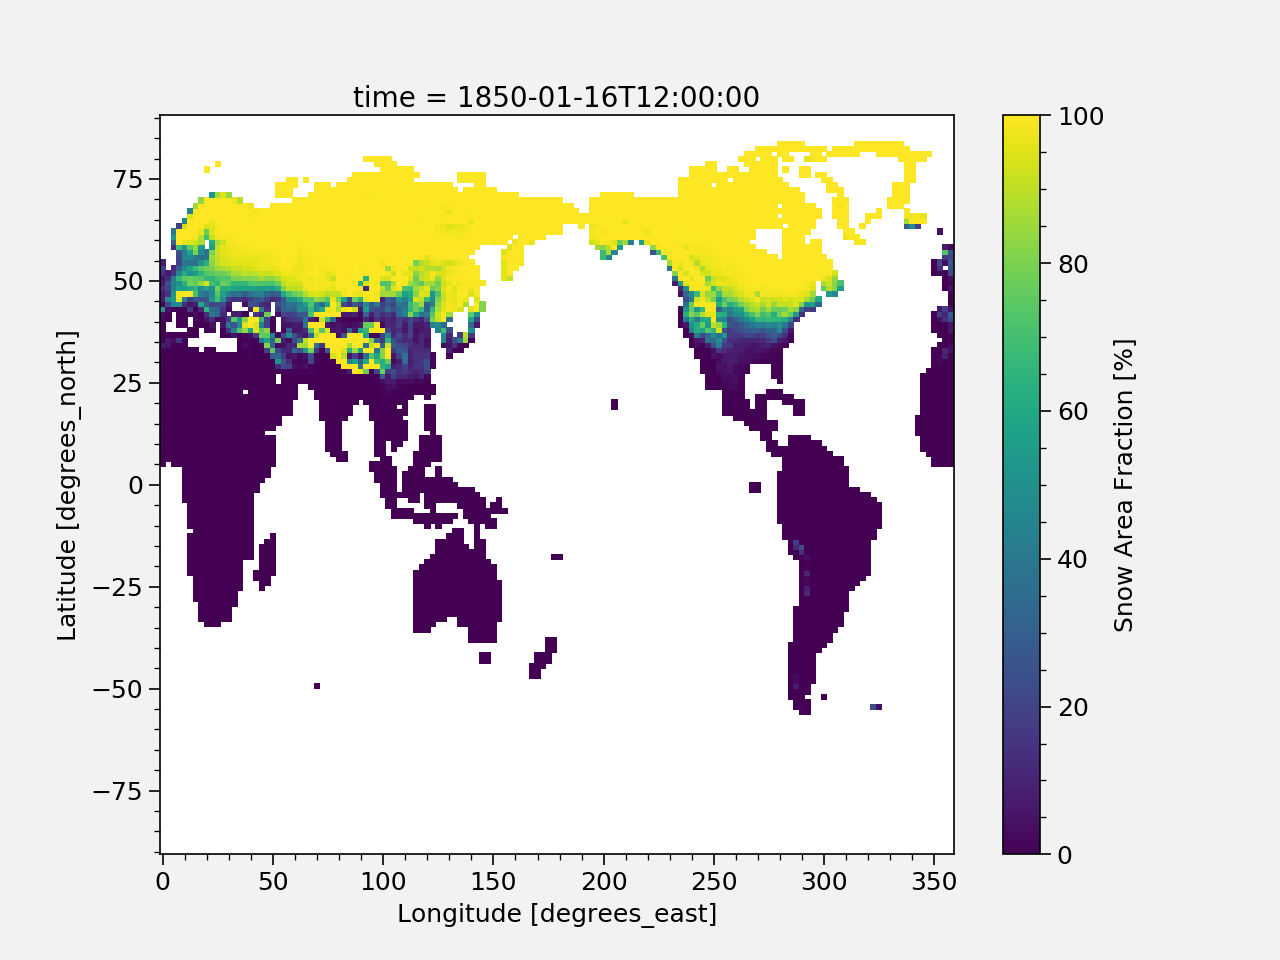

In [3]:
snc_ens_avg[0].plot()

In [4]:
# Get the calendar
calendar = snc_ens_avg.time.encoding['calendar']
calendar

'gregorian'

In [5]:
# Compute the yearly mean
snc_year_mean = u.year_mean(snc_ens_avg, calendar=calendar)
snc_year_mean

<xarray.DataArray (year: 165, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [6]:
# Compute the spatial average
snc_year_mean_spatial_avg = u.spatial_average(snc_year_mean)
snc_year_mean_spatial_avg

<xarray.DataArray (year: 165)>
array([16.61043726, 16.53923748, 16.57428629, 16.57882033, 16.47735636,
       16.56049757, 16.64183945, 16.43492389, 16.56553333, 16.59174409,
       16.65594314, 16.54662606, 16.64182673, 16.57632752, 16.7207685 ,
       16.5332188 , 16.57714178, 16.53025843, 16.65724891, 16.61558337,
       16.58767111, 16.56227691, 16.65205921, 16.64484477, 16.59091222,
       16.53397885, 16.60175027, 16.57598036, 16.40763349, 16.50444124,
       16.55186841, 16.60374414, 16.48899752, 16.40450891, 16.90349944,
       16.88551098, 16.70927608, 16.67665797, 16.68393266, 16.61377833,
       16.7334039 , 16.80447611, 16.81135311, 16.55554656, 16.61466469,
       16.59141396, 16.60269266, 16.51356796, 16.47272675, 16.44873792,
       16.52132802, 16.58217992, 16.53120299, 16.91936176, 16.89325146,
       16.78174344, 16.58357938, 16.70951205, 16.6968653 , 16.59296666,
       16.53963015, 16.57702128, 16.98535383, 16.99055523, 16.80685802,
       16.64432258, 16.73046646, 16.61815563, 16.49438267, 16.51717189,
       16.54128727, 16.60288188, 16.52905348, 16.43482353, 16.5714972 ,
       16.44239757, 16.41942445, 16.39468728, 16.42440567, 16.48462365,
       16.5333944 , 16.47315255, 16.47003218, 16.5227637 , 16.49197546,
       16.40770597, 16.51532054, 16.38639241, 16.42969987, 16.43323243,
       16.45128855, 16.36964792, 16.46467954, 16.3002409 , 16.4435415 ,
       16.36104973, 16.33559639, 16.39500321, 16.34042936, 16.27911605,
       16.29391172, 16.2964744 , 16.41096737, 16.24501416, 16.258124  ,
       16.28104921, 16.38213212, 16.36047001, 16.25704711, 16.29138372,
       16.28624498, 16.31809862, 16.30671662, 16.33635681, 16.50982857,
       16.56114284, 16.42193463, 16.41236046, 16.43151295, 16.29602556,
       16.23687009, 16.35581492, 16.35527909, 16.32478034, 16.25969868,
       16.19525908, 16.34386141, 16.29632681, 16.33444768, 16.25813301,
       16.20046281, 16.21463354, 16.08473655, 16.39948106, 16.34624877,
       16.14684828, 15.98625745, 16.01490369, 16.12017504, 15.89776583,
       15.92502922, 15.91565807, 16.23236579, 16.06907539, 16.00038812,
       15.85535469, 15.8320533 , 15.78445986, 15.7162877 , 15.64673586,
       15.7103309 , 15.58854628, 15.50413786, 15.51224367, 15.49936032,
       15.44990518, 15.48571539, 15.39220894, 15.49859806, 15.40521329,
       15.29472122, 15.27219528, 15.33363955, 15.19769513, 15.15976575])
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

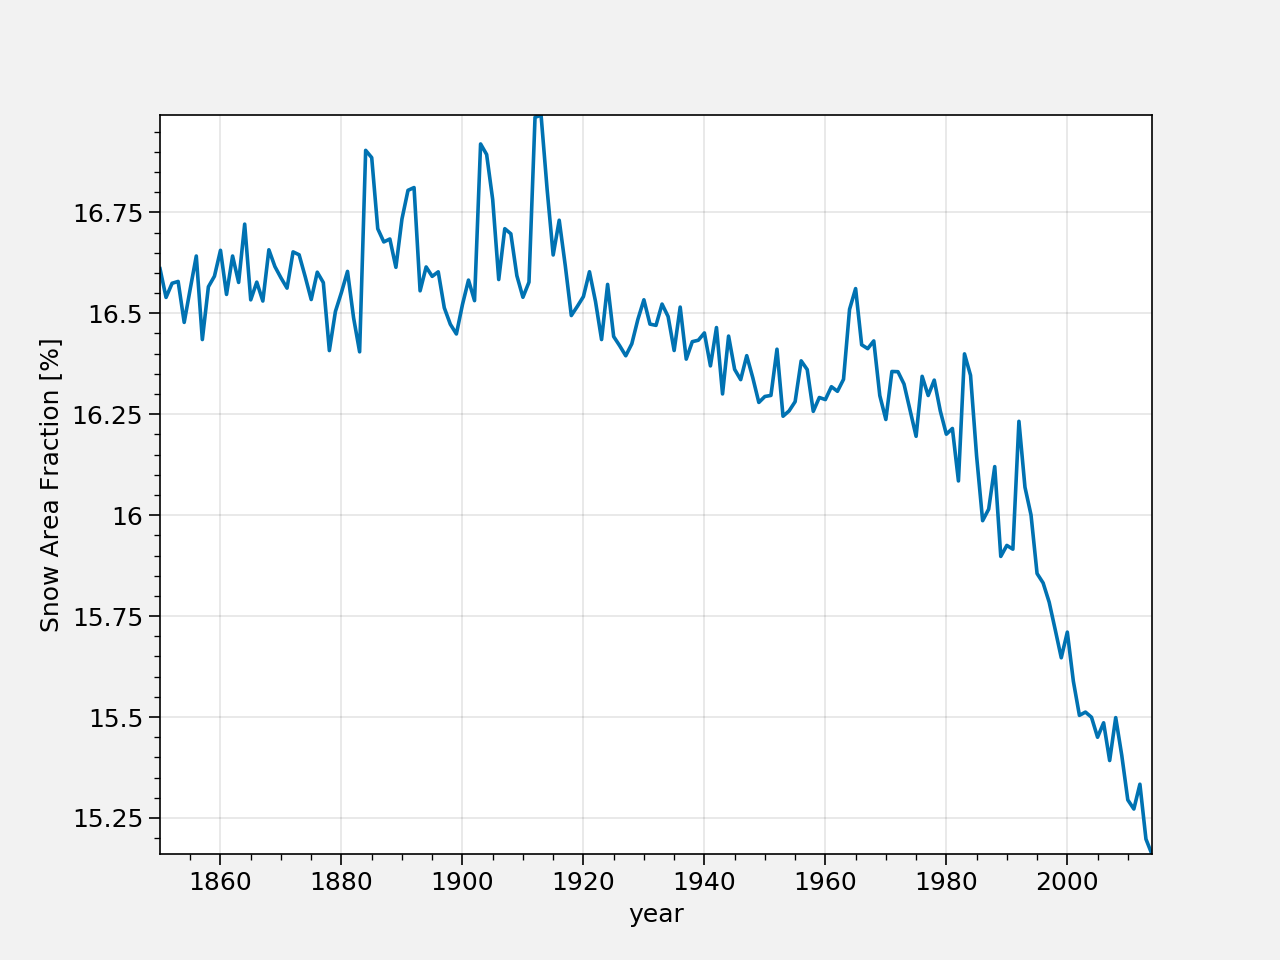

In [7]:
# Plot snow area fraction of lands! (we do not take into account the ocean and ice-sheets)
snc_year_mean_spatial_avg.plot()

# Load reanalysis

In [8]:
snowc_mon_noaaV2c = xr.open_dataset('/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc').snowc
snowc_mon_noaaV2c

<xarray.DataArray 'snowc' (time: 1968, lat: 94, lon: 192)>
[35518464 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1851-01-01 1851-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [  0. 100.]

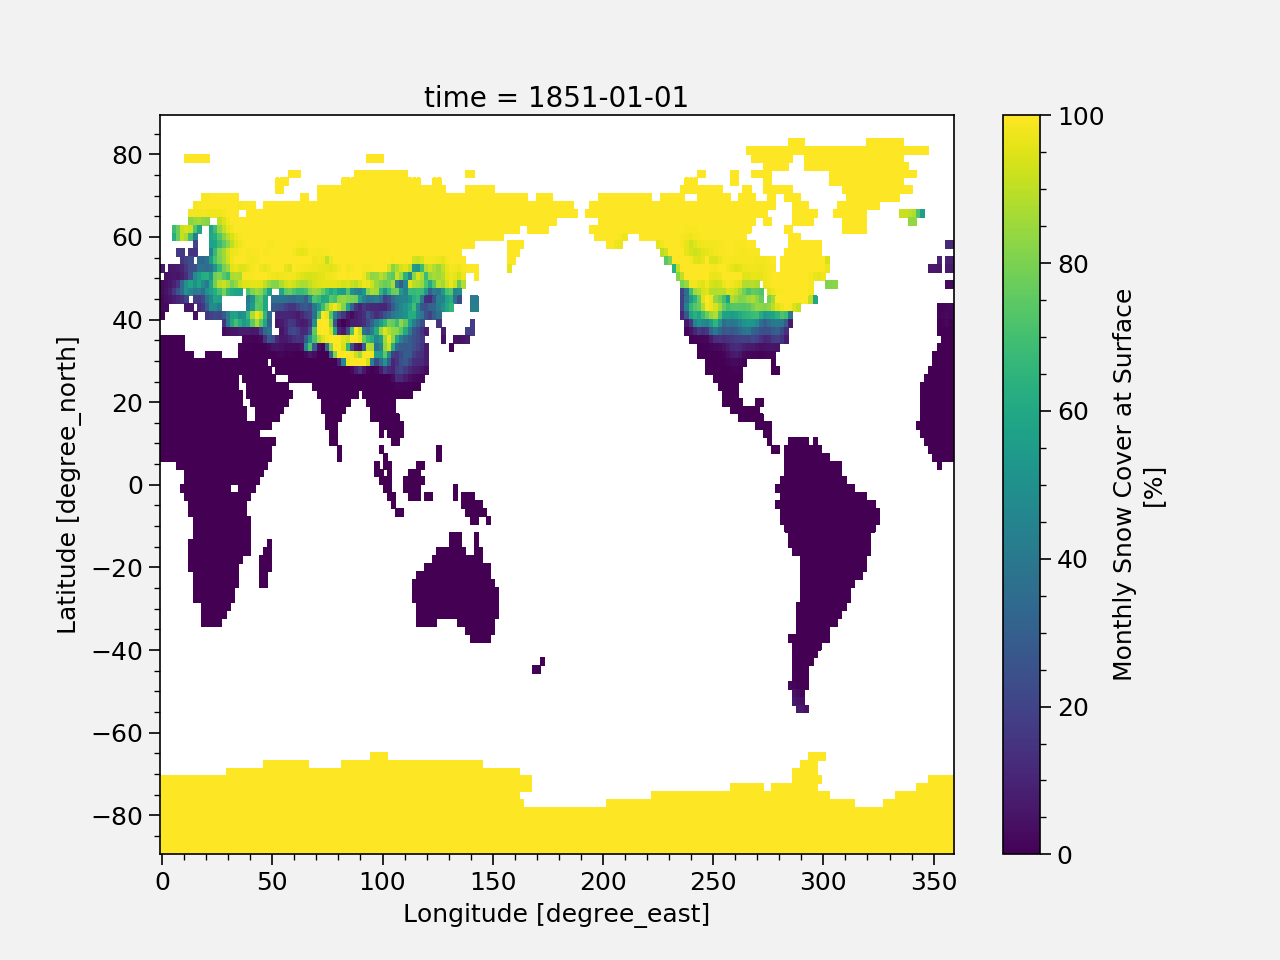

In [9]:
snowc_mon_noaaV2c[0].plot()

In [10]:
# Compute the yearly mean
snowc_noaaV2c_year_mean = u.year_mean(snowc_mon_noaaV2c)
snowc_noaaV2c_year_mean

<xarray.DataArray (year: 164, lat: 94, lon: 192)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       ...,

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * year     (year) int64 1851 1852 1853 1854 1855 ... 2010 2011 2012 2013 2014
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [  0. 100.]

In [11]:
regridder_noaa = xe.Regridder(snowc_noaaV2c_year_mean, snc_year_mean, 'bilinear', periodic=True)
regridder_noaa

Overwrite existing file: bilinear_94x192_143x144_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_94x192_143x144_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (94, 192) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [12]:
snowc_noaaV2c_year_mean_regrid = regridder_noaa(snowc_noaaV2c_year_mean)
snowc_noaaV2c_year_mean_regrid

<xarray.DataArray (year: 164, lat: 143, lon: 144)>
array([[[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]])
Coordinates:
  * year     (year) int64 1851 1852 1853 1854 1855 ... 2010 2011 2012 2013 2014
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
Attributes:
    regrid_method:  bilinear

In [13]:
with xr.set_options(keep_attrs=True):
    diff = snc_year_mean - snowc_noaaV2c_year_mean_regrid
    
diff

<xarray.DataArray (year: 164, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * year     (year) int64 1851 1852 1853 1854 1855 ... 2010 2011 2012 2013 2014
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

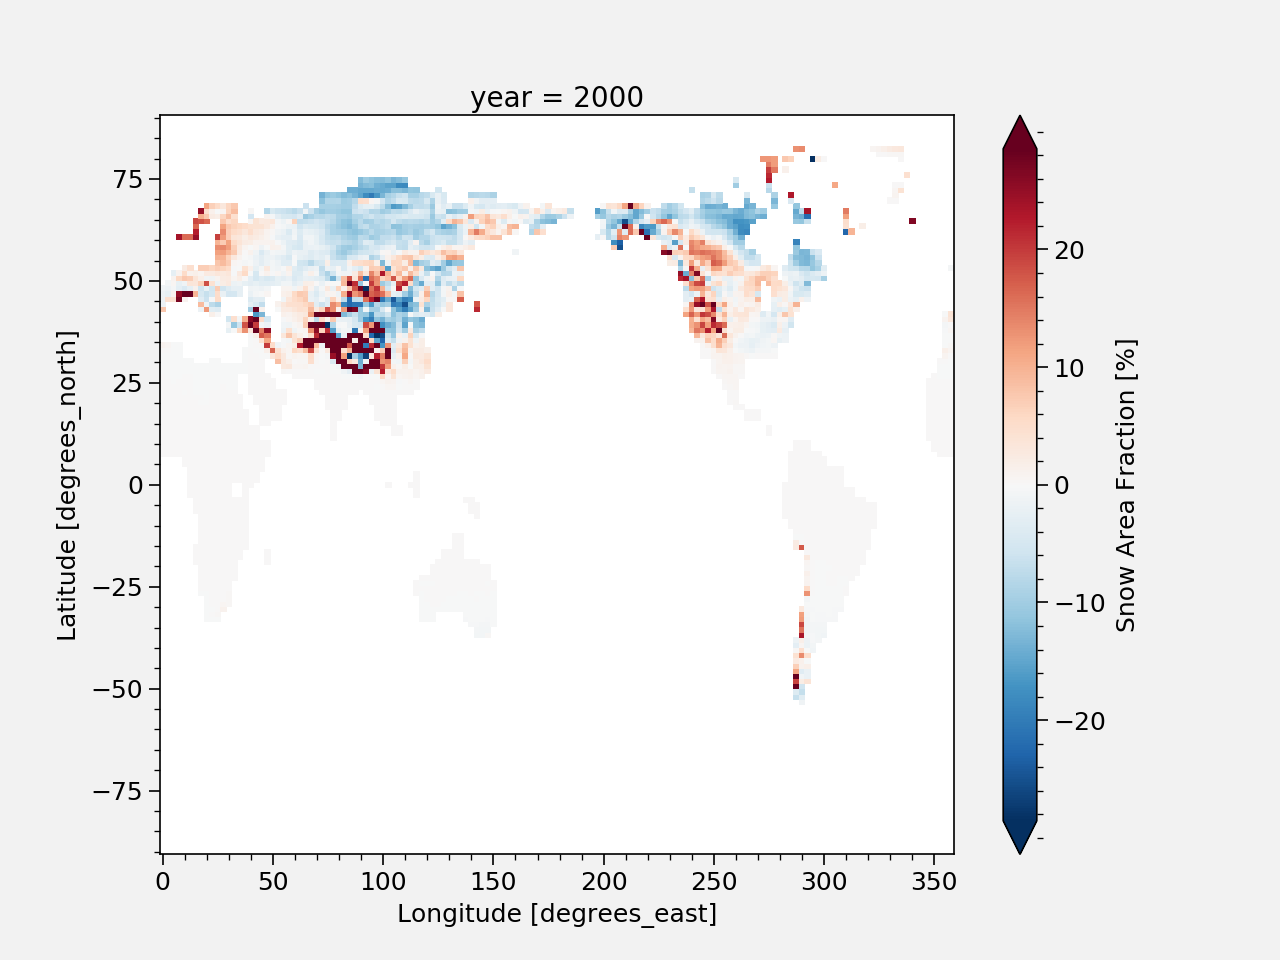

In [14]:
diff.sel(year=2000).plot(robust=True)

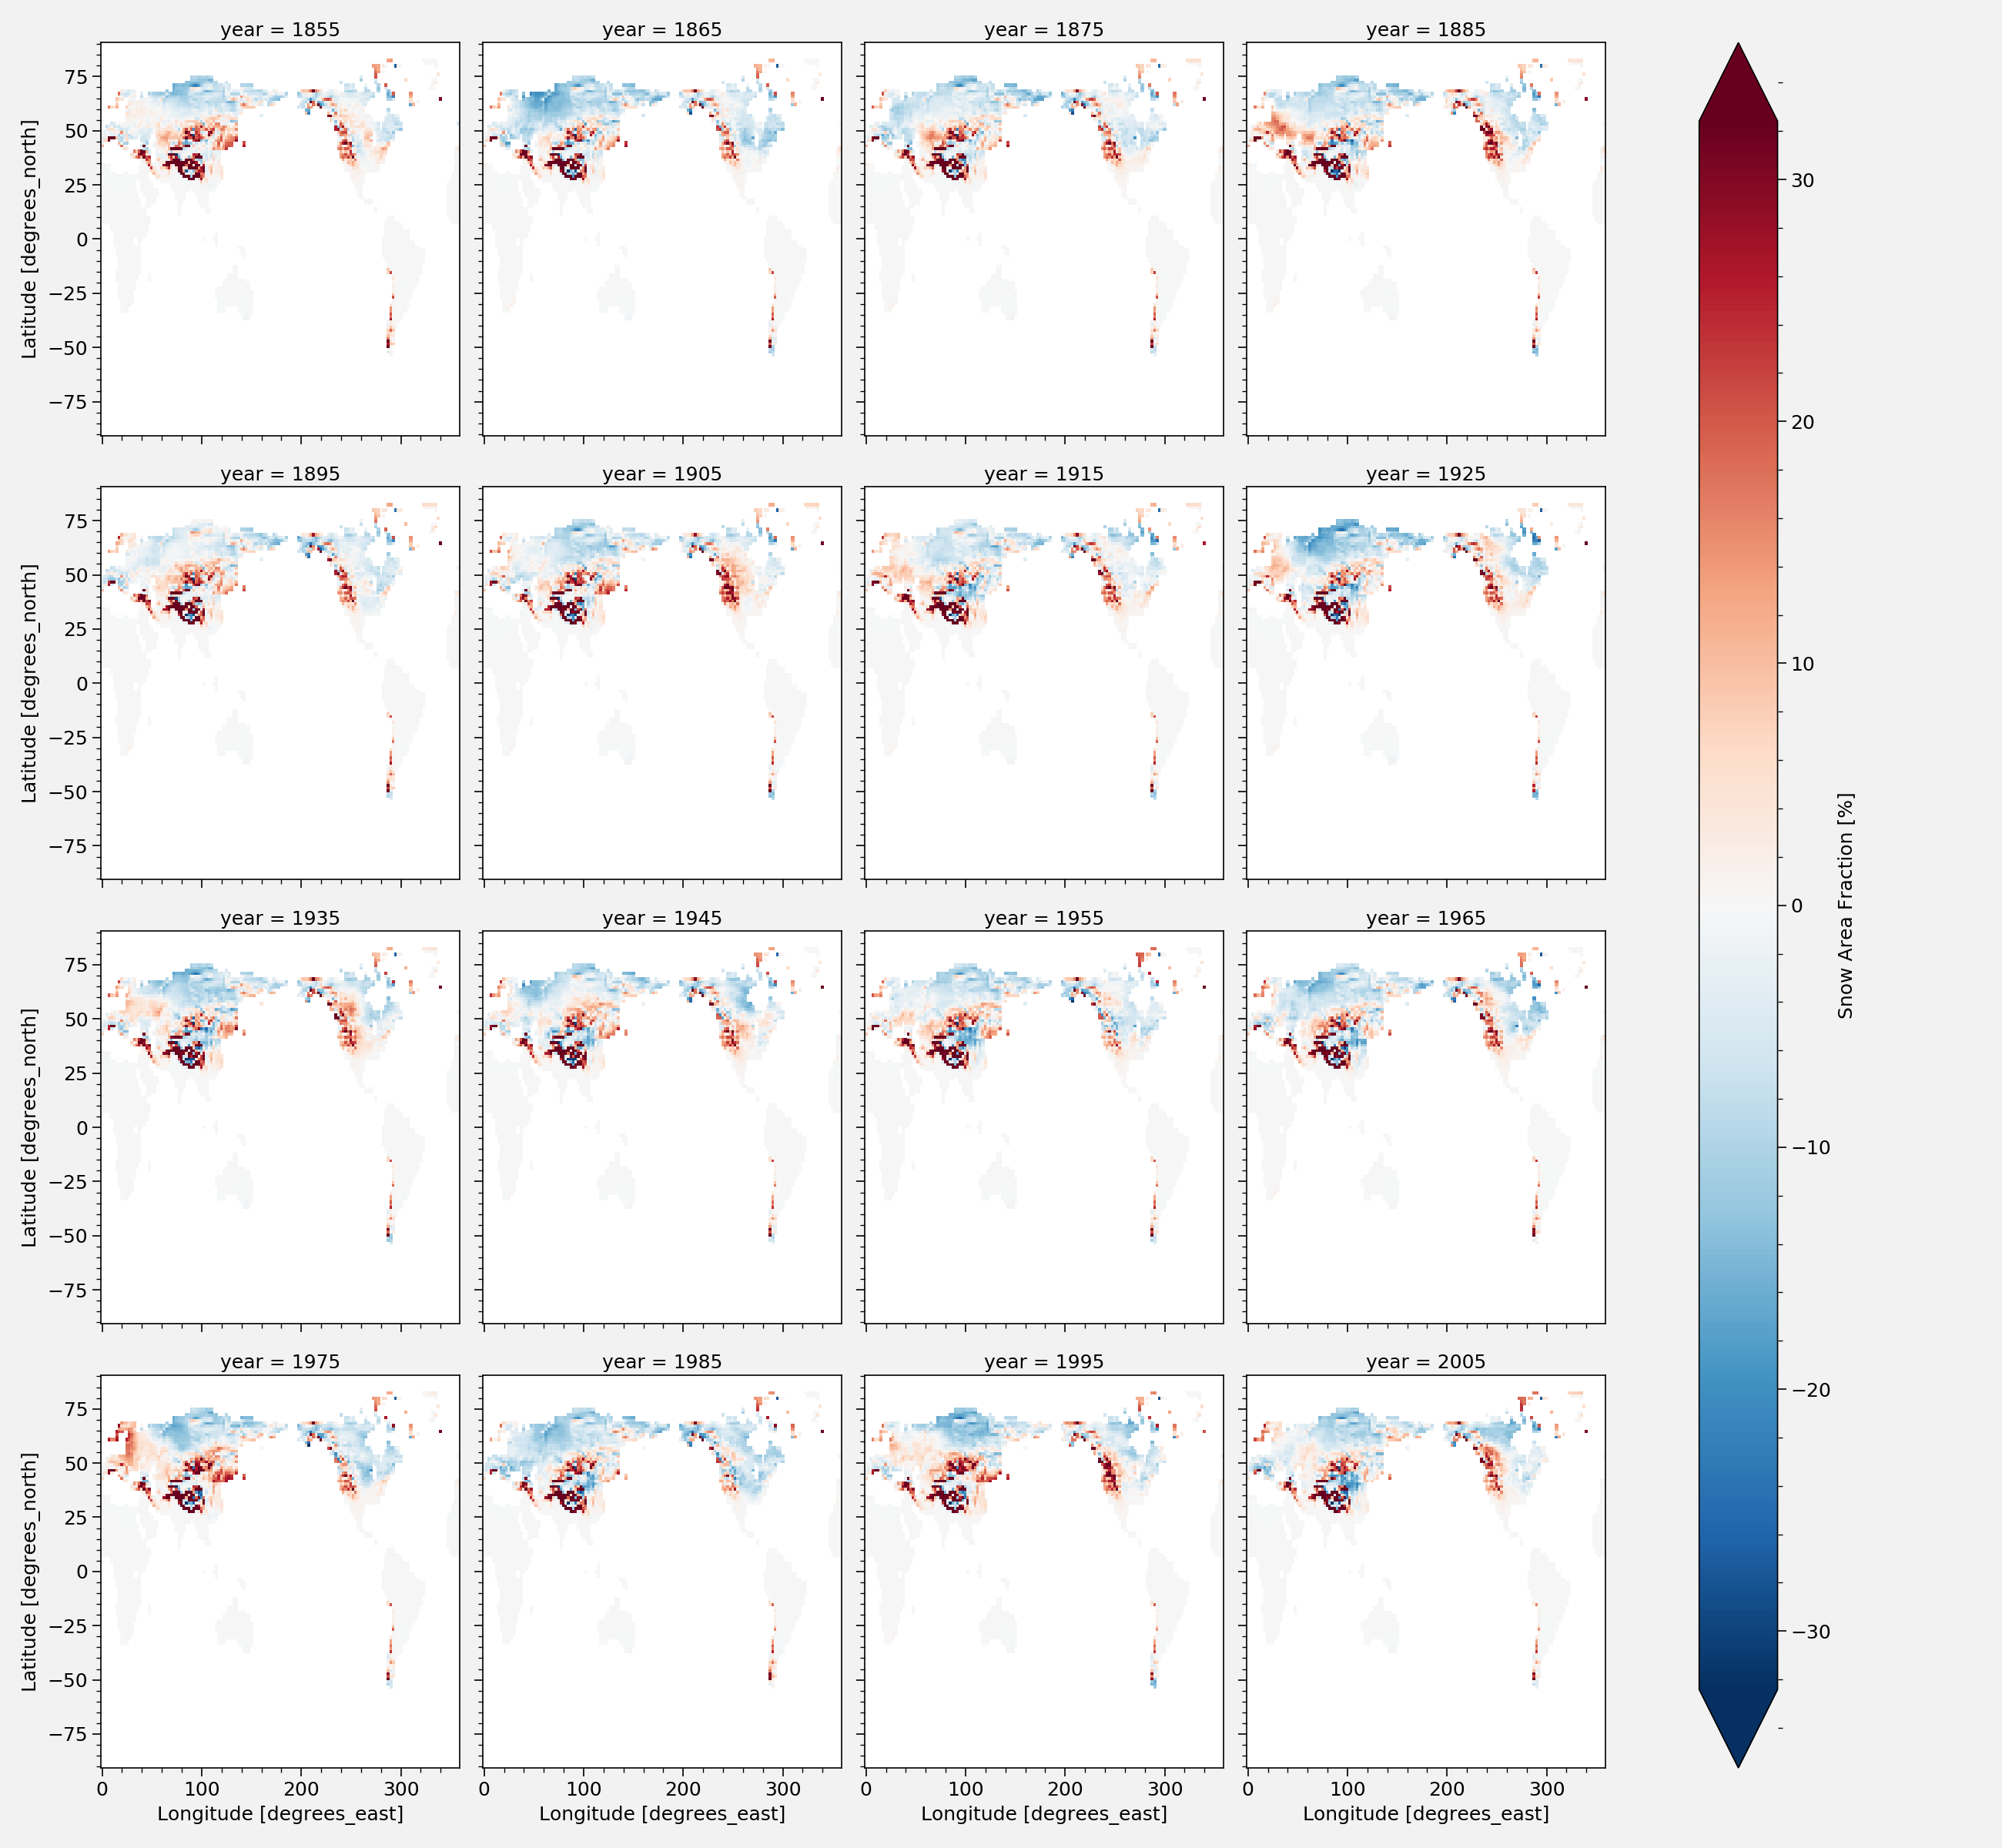

In [15]:
diff[4:-1:10].plot(col='year', col_wrap=4, robust=True)

<Figure size 640x480 with 0 Axes>

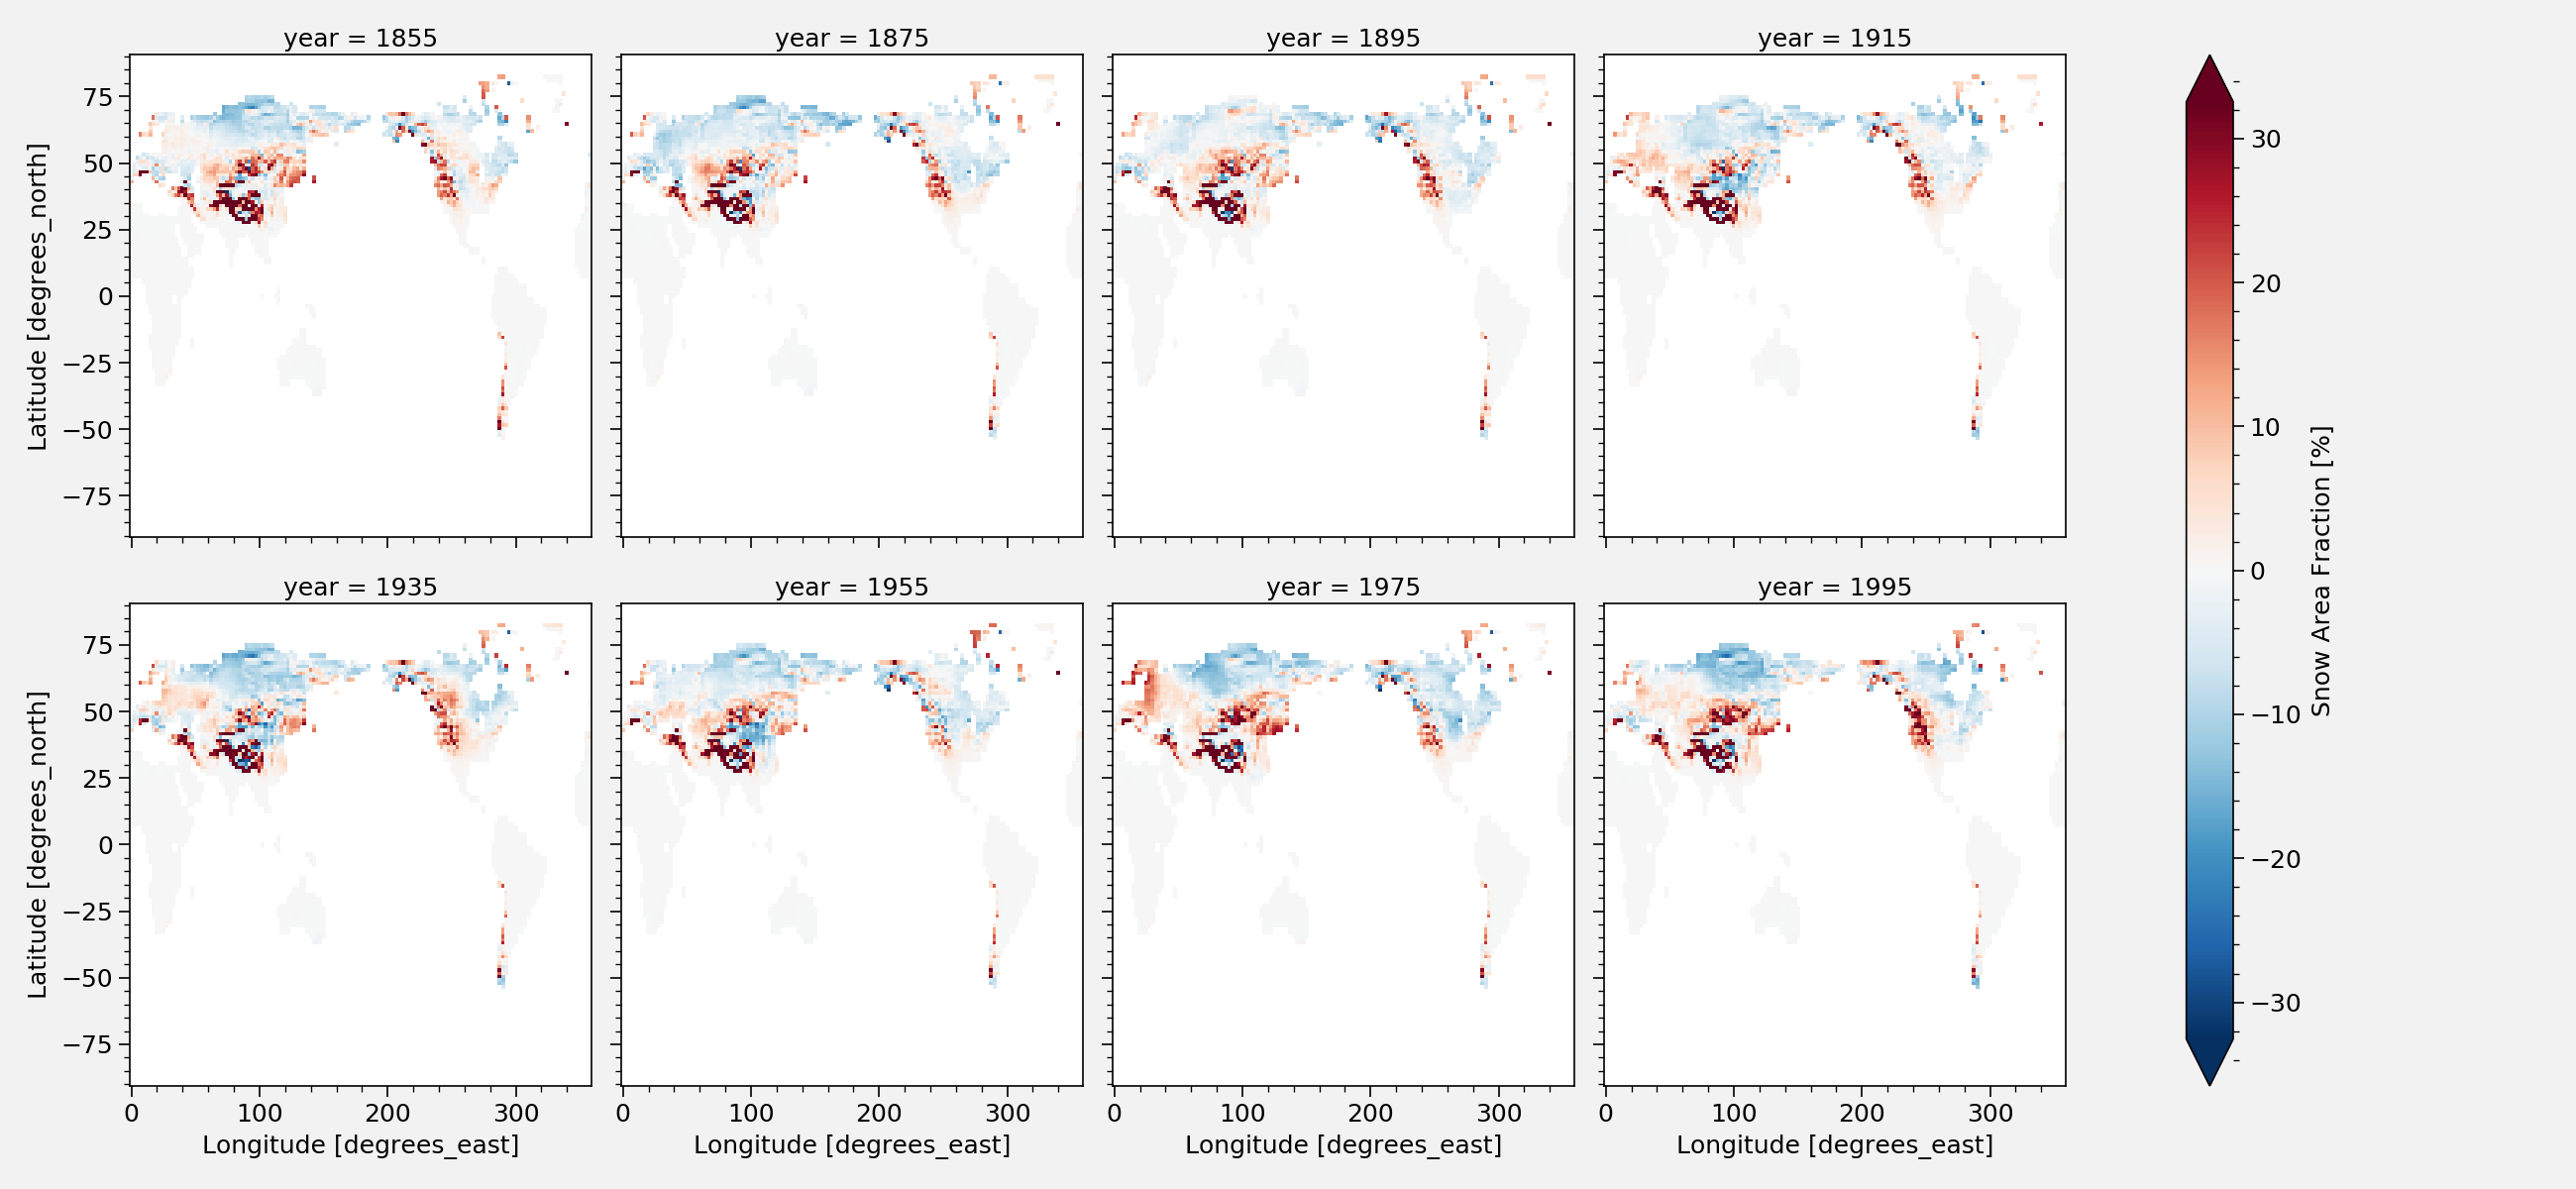

In [33]:
plt.figure()
diff[4:-1:20].plot(col='year', col_wrap=4, robust=True)
plt.savefig('bias_years.png')

# The bias is always present! 
Even before the decreasing of snow area fraction.

# Other reanalysis

In [84]:
snowc_mon_ncar = xr.open_dataset('/home/msantola/TP_CLiMAF/SharedObsSnow/snc_ncarcfsr_1979-2016_0.5x0.5.nc').snowc
snowc_mon_ncar = snowc_mon_ncar.where(snowc_mon_ncar<=100)
snowc_mon_ncar

<xarray.DataArray 'snowc' (time: 456, lat: 361, lon: 720)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ...,

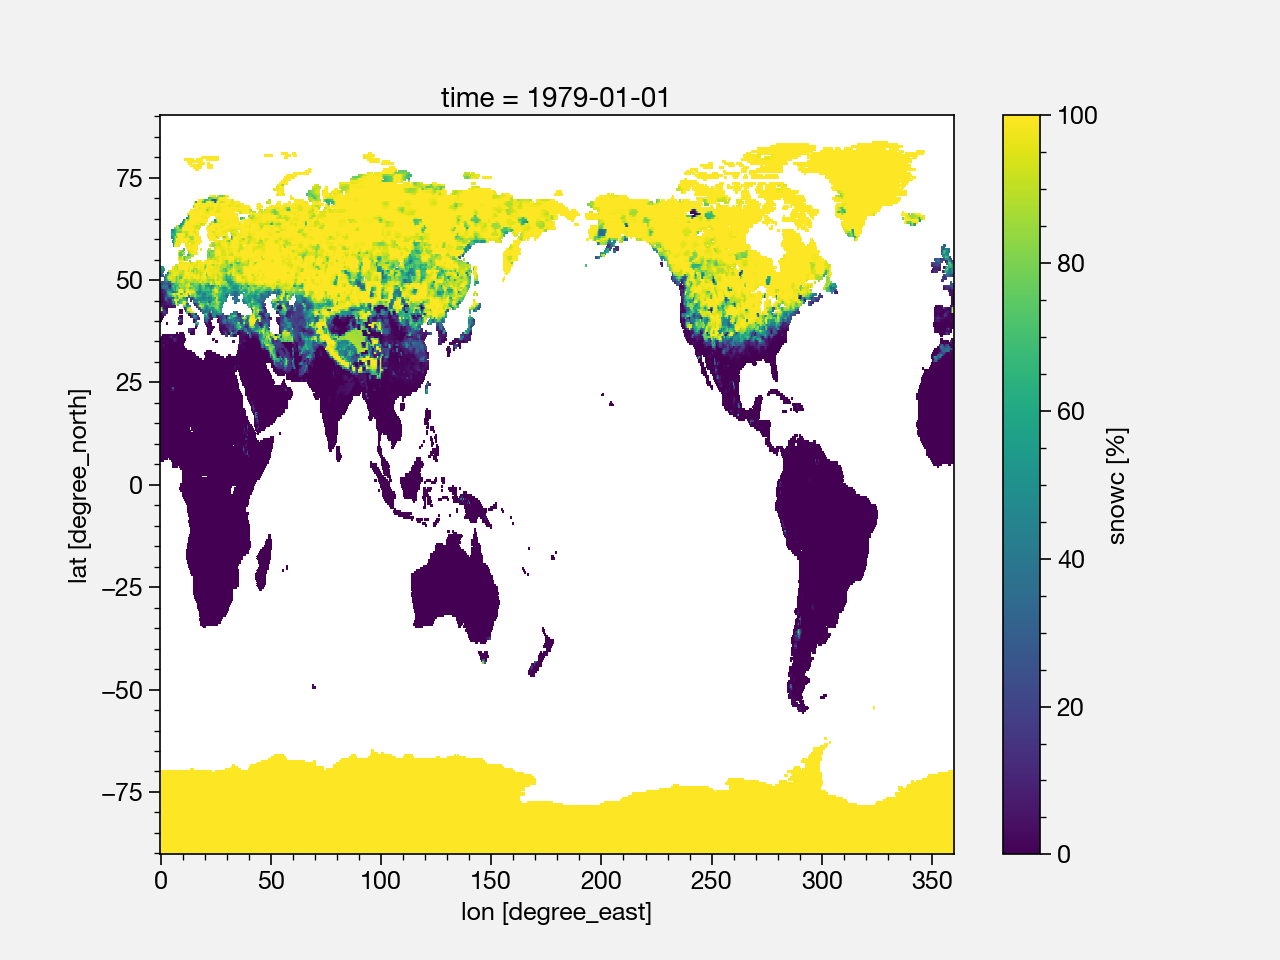

In [85]:
snowc_mon_ncar[0].plot()

In [86]:
# Compute the yearly mean
snowc_ncar_year_mean = u.year_mean(snowc_mon_ncar)
snowc_ncar_year_mean

<xarray.DataArray (year: 38, lat: 361, lon: 720)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 10

In [120]:
regridder_ncar = xe.Regridder(snowc_ncar_year_mean, snc_year_mean, 'bilinear', periodic=True)
regridder_ncar

Overwrite existing file: bilinear_361x720_143x144_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_361x720_143x144_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (361, 720) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [88]:
snowc_ncar_year_mean_regrid = regridder_ncar(snowc_ncar_year_mean)
snowc_ncar_year_mean_regrid

<xarray.DataArray (year: 38, lat: 143, lon: 144)>
array([[[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  n

In [104]:
with xr.set_options(keep_attrs=True):
    diff = snc_year_mean - snowc_ncar_year_mean_regrid
    
diff

<xarray.DataArray (year: 36, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan

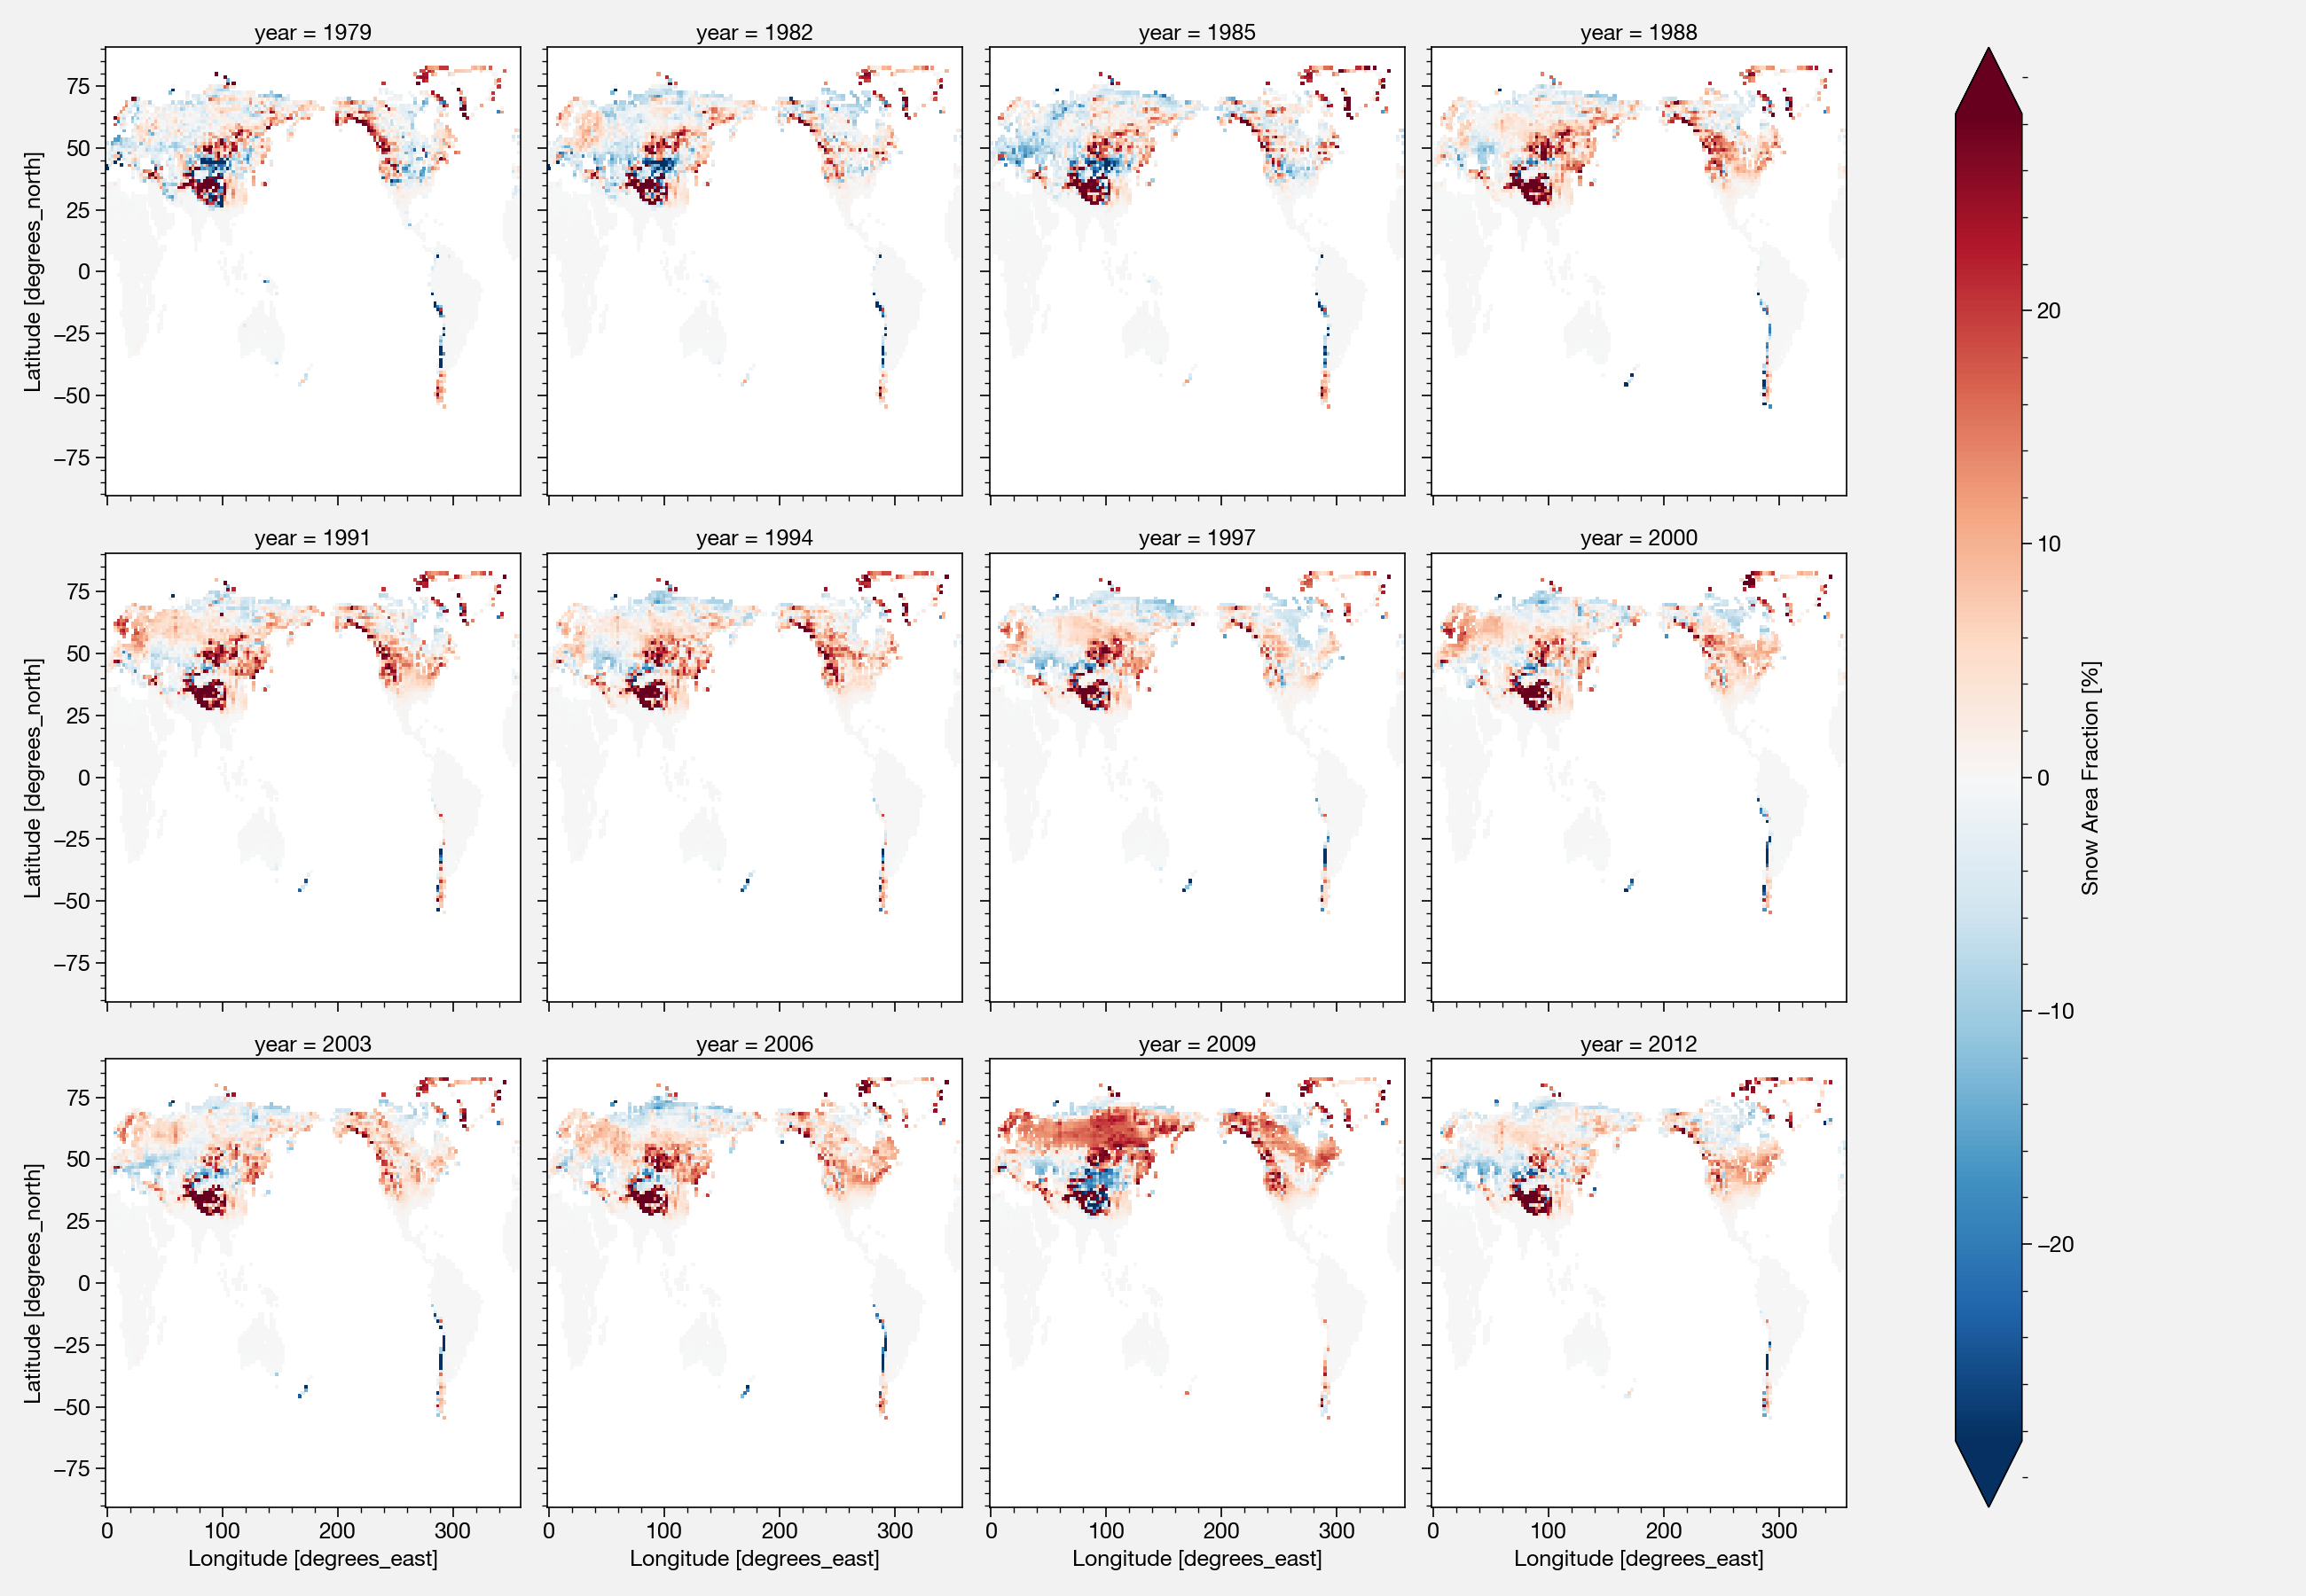

In [108]:
diff[0:-1:3].plot(col='year', col_wrap=4, robust=True)

# Similar result

# Is this bias present for all members?
Let's take a subperiod 1979 to 2014 and let's compare the annual climatology to both reanalyses

In [34]:
snc = u.get_data_IPSL_CM6A_LR('snc', time=slice('1979','2014'), experiment='historical')
snc

<xarray.DataArray 'snc' (realization: 32, time: 432, lat: 143, lon: 144)>
dask.array<concatenate, shape=(32, 432, 143, 144), dtype=float32, chunksize=(1, 432, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 1979-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat          (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * realization  (realization) object 'r1i1p1f1' 'r2i1p1f1' ... 'r32i1p1f1'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [35]:
snc_clim = u.clim(snc, calendar='gregorian')
snc_clim

<xarray.DataArray (realization: 32, lat: 143, lon: 144)>
dask.array<sum-aggregate, shape=(32, 143, 144), dtype=float64, chunksize=(1, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * realization  (realization) object 'r1i1p1f1' 'r2i1p1f1' ... 'r32i1p1f1'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [36]:
snowc_mon_noaaV2c = xr.open_dataset('/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc').snowc.sel(time=slice('1979','2014'))
snowc_mon_noaaV2c

<xarray.DataArray 'snowc' (time: 432, lat: 94, lon: 192)>
[7796736 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [  0. 100.]

In [37]:
snowc_mon_noaaV2c_clim = u.clim(snowc_mon_noaaV2c, calendar='gregorian')
snowc_mon_noaaV2c_clim

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [  0. 100.]

In [38]:
snowc_mon_ncar = xr.open_dataset('/home/msantola/TP_CLiMAF/SharedObsSnow/snc_ncarcfsr_1979-2016_0.5x0.5.nc').snowc.sel(time=slice('1979','2014'))
snowc_mon_ncar = snowc_mon_ncar.where(snowc_mon_ncar<=100)
snowc_mon_ncar

<xarray.DataArray 'snowc' (time: 432, lat: 361, lon: 720)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       ...,

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2014-12-01
Attributes:
    units:    %

In [39]:
snowc_mon_ncar_clim = u.clim(snowc_mon_ncar, calendar='gregorian')
snowc_mon_ncar_clim

<xarray.DataArray (lat: 361, lon: 720)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    units:    %

In [41]:
snowc_mon_noaaV2c_clim_regrid = regridder_noaa(snowc_mon_noaaV2c_clim)
# snowc_mon_ncar_clim_regrid = regridder_ncar(snowc_mon_ncar_clim)

In [42]:
with xr.set_options(keep_attrs=True):
    diff_noaa = snc_clim - snowc_mon_noaaV2c_clim_regrid
#     diff_ncar = snc_clim - snowc_mon_ncar_clim_regrid

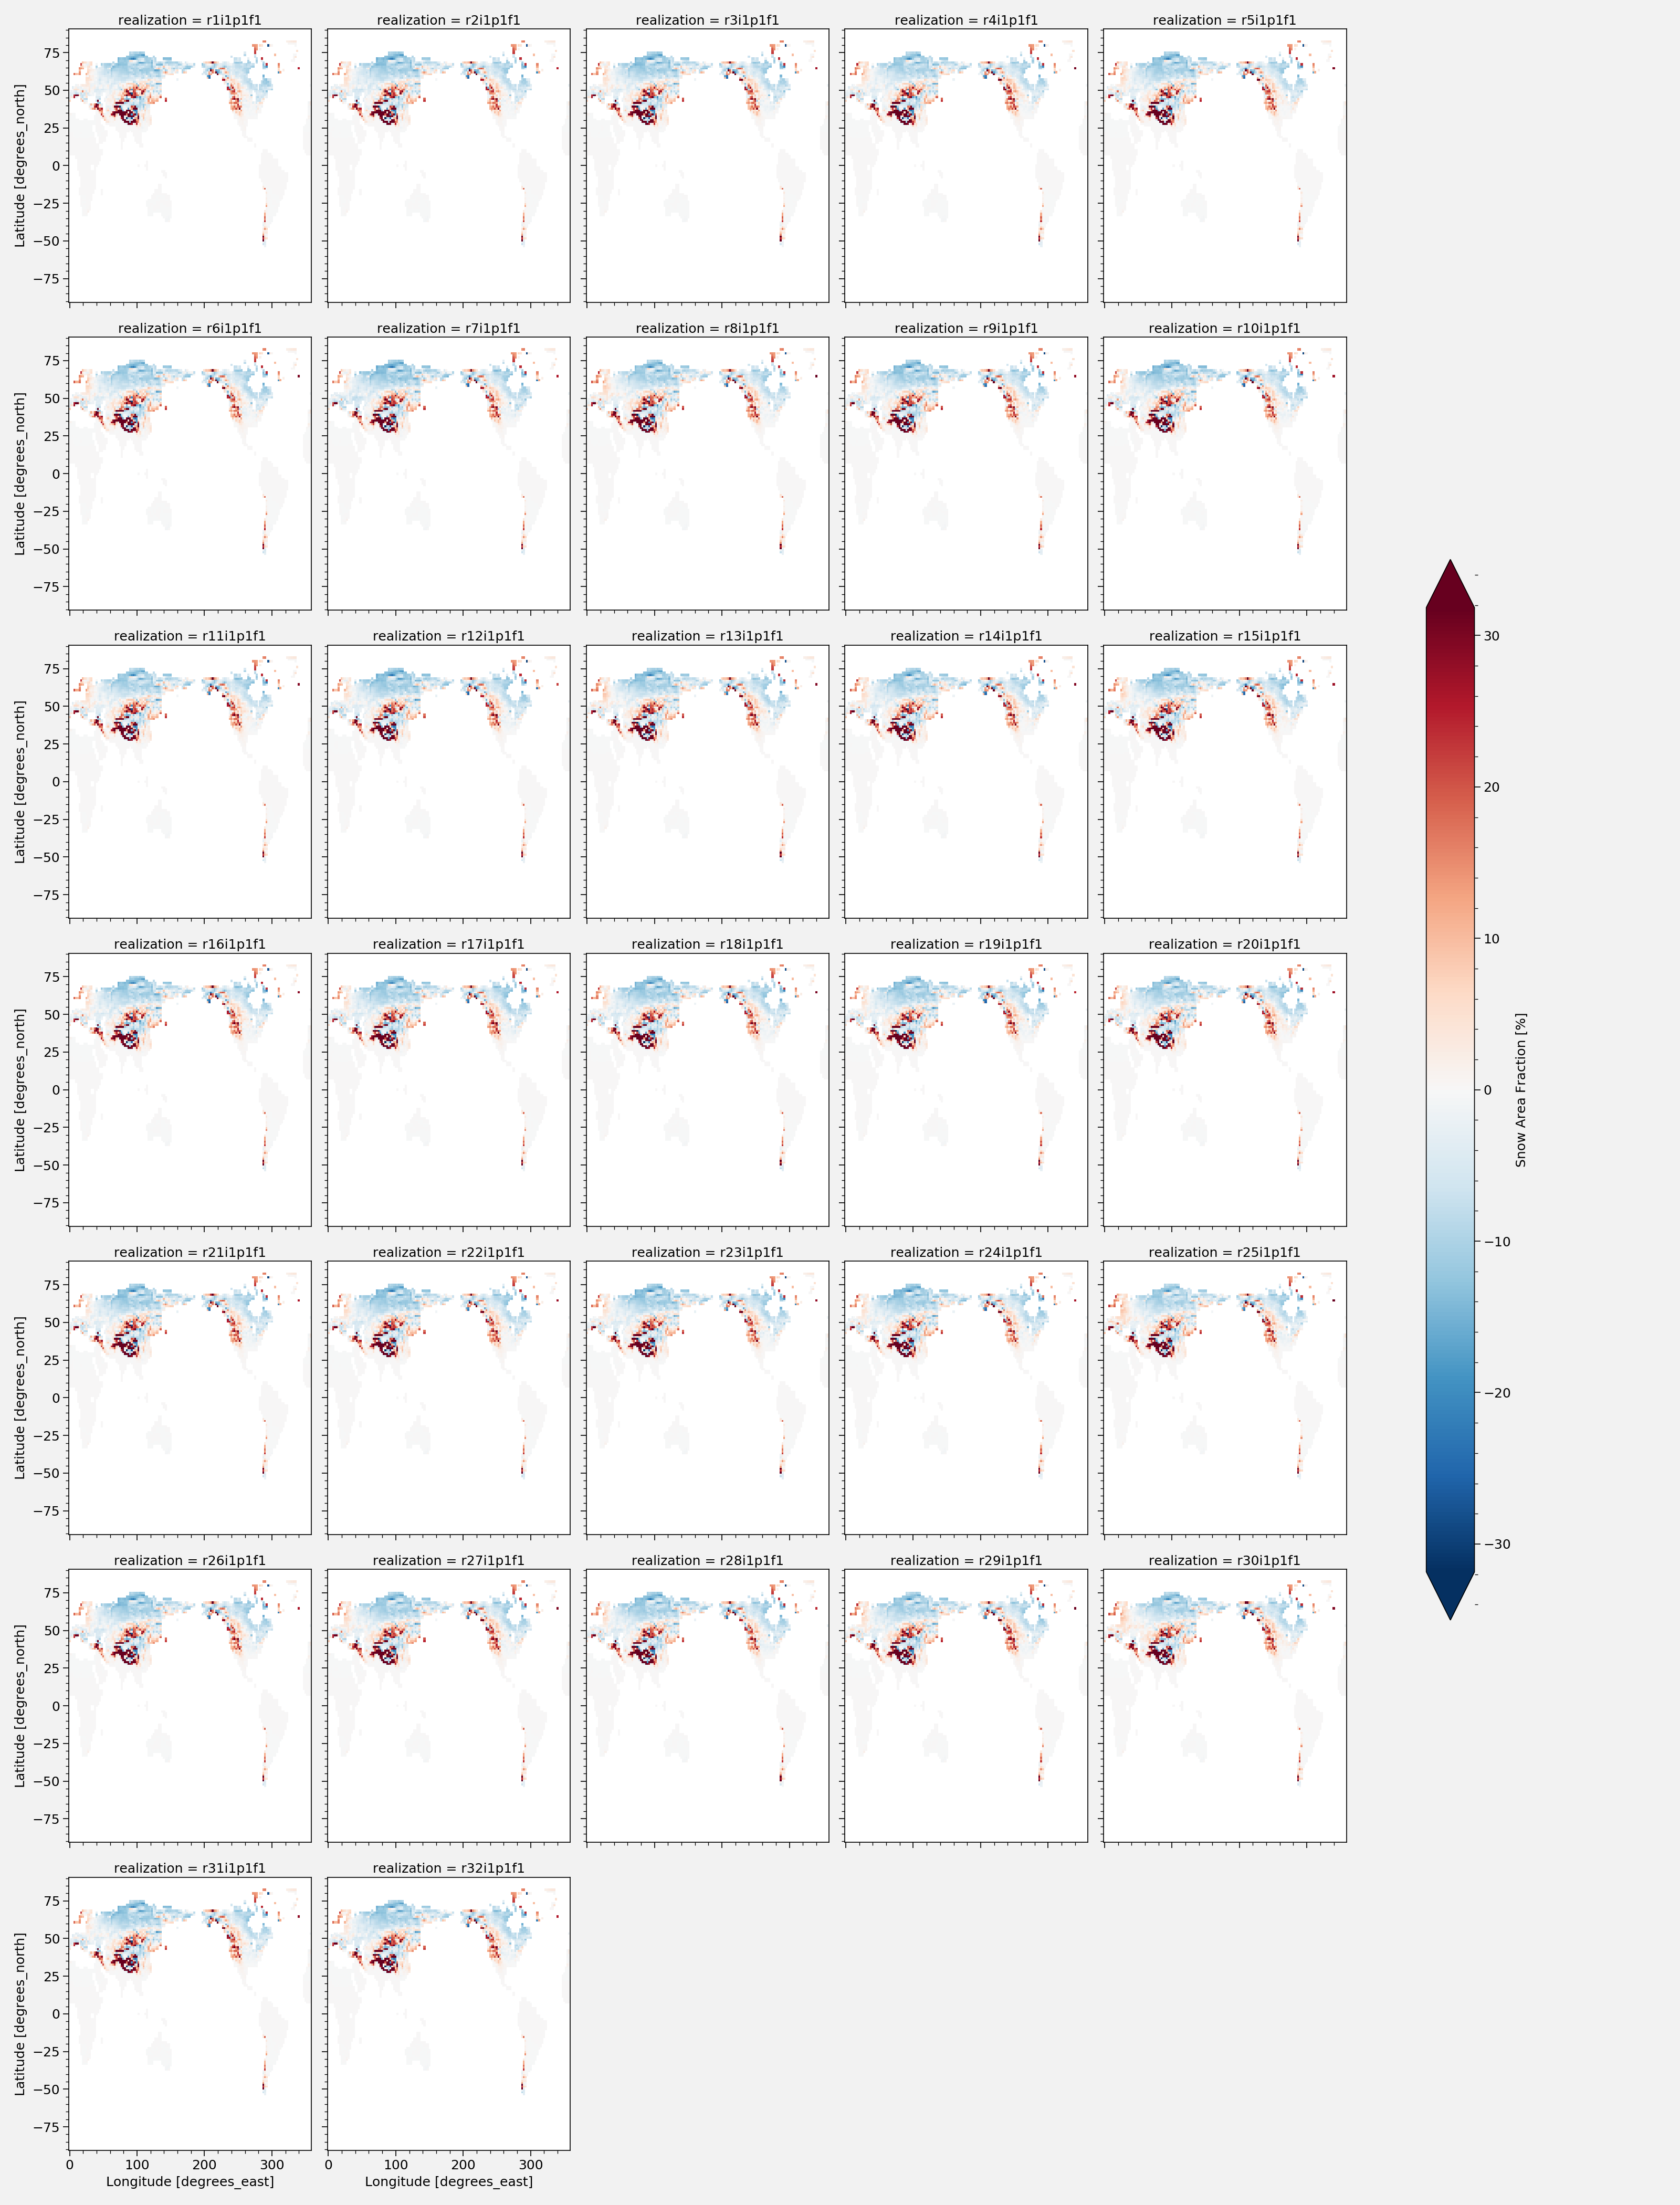

In [43]:
diff_noaa.plot(col='realization', col_wrap=5, robust=True,
              cbar_kwargs={'shrink': 0.5})

<Figure size 640x480 with 0 Axes>

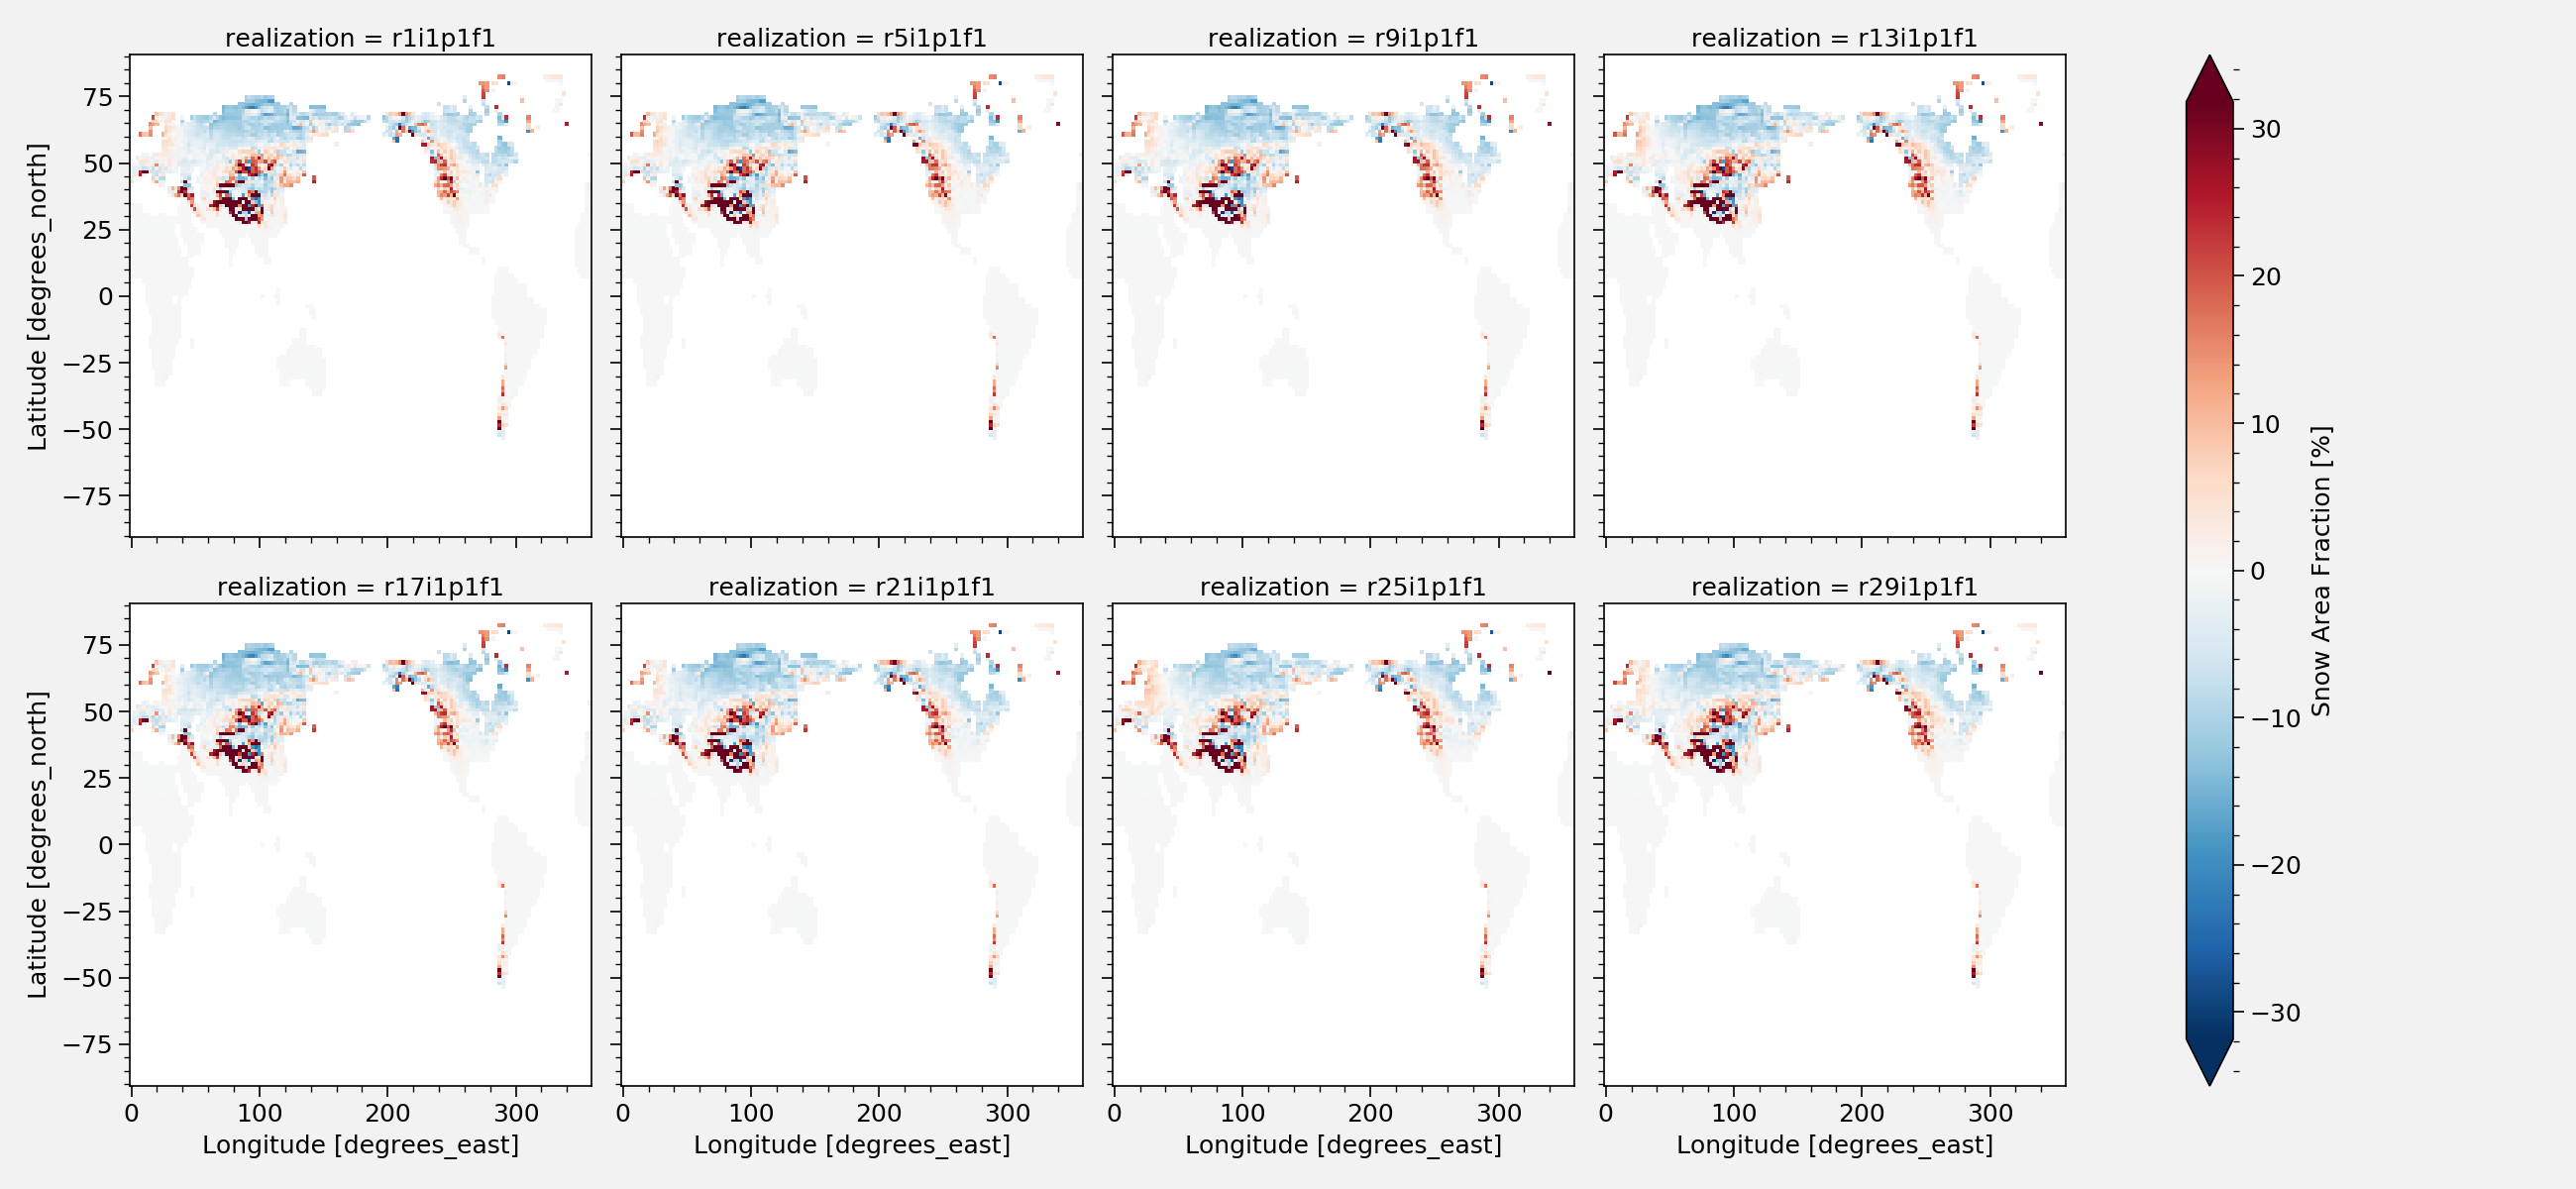

In [51]:
plt.figure()
diff_noaa[0:-1:4].plot(col='realization', col_wrap=4, robust=True)
plt.savefig('bias_members.png')

In [ ]:
diff_ncar.plot(col='realization', col_wrap=5, robust=True,
              cbar_kwargs={'shrink': 0.5})

# The bias is present for all members!